#Dataset Processing

In [1]:
#Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Dataset read
pd.set_option('display.float_format', lambda x: '%.3f' % x)
loan = pd.read_csv('/content/loan.csv', encoding= 'unicode_escape')


In [4]:
#Dataset description in table 1.1
loan.isnull().sum()
loan.shape
loan[(loan.loan_status == 'Current')]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
4,1075358,1311748,3000,3000,3000.000,60 months,12.69%,67.790,B,B5,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
32,1065420,1299514,10000,10000,9975.000,60 months,15.96%,242.970,C,C5,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
39,1069346,1304237,12500,12500,12475.000,60 months,12.69%,282.440,B,B5,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
86,1063958,1297940,14000,14000,13975.000,60 months,17.27%,349.980,D,D3,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
95,1068575,1303001,15300,15300,15275.000,60 months,22.06%,423.100,F,F4,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15972,725556,920821,10400,10400,10400.000,60 months,6.00%,218.990,E,E3,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
15981,738420,935790,6000,6000,6000.000,60 months,10.37%,128.580,B,B3,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
16361,733695,930086,19200,19200,18847.763,60 months,10.74%,414.970,B,B4,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
16609,728422,924106,9350,9350,9350.000,60 months,10.00%,198.660,B,B2,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN


In [5]:
#Counting values in each sort of loan status
loan.loan_status.value_counts()

#Filtering out record with loan status as "Current"
filter_loan = loan[~(loan.loan_status == 'Current')]
filter_loan.loan_status.unique()
filter_loan.shape

(38577, 111)

In [7]:
filter_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.000,36 months,7.90%,156.460,A,A4,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN


In [8]:
filter_loan = filter_loan.loc[:, filter_loan.isin([' ','NULL',0,np.nan]).mean() < .6]
filter_loan.shape

(38577, 41)

In [9]:
filter_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,...,f,5863.155,5833.840,5000.000,863.160,Jan-15,171.620,May-16,1,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,...,f,1008.710,1008.710,456.460,435.170,Apr-13,119.660,Sep-13,1,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,...,f,3005.667,3005.670,2400.000,605.670,Jun-14,649.910,May-16,1,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,...,f,12231.890,12231.890,10000.000,2214.920,Jan-15,357.480,Apr-16,1,INDIVIDUAL
5,1075269,1311441,5000,5000,5000.000,36 months,7.90%,156.460,A,A4,...,f,5632.210,5632.210,5000.000,632.210,Jan-15,161.030,Jan-16,1,INDIVIDUAL


In [10]:
#checking for null values
filter_loan.isnull().sum()

filter_loan.loan_amnt.value_counts()

10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
18325       1
9650        1
20450       1
15425       1
22550       1
Name: loan_amnt, Length: 870, dtype: int64

In [11]:
#Info regarding the filtered dataset
filter_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38577 non-null  int64  
 1   member_id            38577 non-null  int64  
 2   loan_amnt            38577 non-null  int64  
 3   funded_amnt          38577 non-null  int64  
 4   funded_amnt_inv      38577 non-null  float64
 5   term                 38577 non-null  object 
 6   int_rate             38577 non-null  object 
 7   installment          38577 non-null  float64
 8   grade                38577 non-null  object 
 9   sub_grade            38577 non-null  object 
 10  emp_title            36191 non-null  object 
 11  emp_length           37544 non-null  object 
 12  home_ownership       38577 non-null  object 
 13  annual_inc           38577 non-null  float64
 14  verification_status  38577 non-null  object 
 15  issue_d              38577 non-null 

In [12]:
#deleting unnecessary features
filter_loan2 = filter_loan.drop(['member_id','id','pymnt_plan','url','desc','title','zip_code','addr_state','earliest_cr_line','initial_list_status'], axis=1)
filter_loan2 = filter_loan.drop(['application_type','policy_code','funded_amnt','funded_amnt_inv','emp_title'], axis = 1)

filter_loan2.shape
filter_loan2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38577 non-null  int64  
 1   member_id            38577 non-null  int64  
 2   loan_amnt            38577 non-null  int64  
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           37544 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  pymnt_plan           38577 non-null  object 
 15  url                  38577 non-null 

In [13]:
filter_loan2.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,1077501,1296599,5000,36 months,10.65%,162.870,B,B2,10+ years,RENT,...,83.70%,9,f,5863.155,5833.840,5000.000,863.160,Jan-15,171.620,May-16
1,1077430,1314167,2500,60 months,15.27%,59.830,C,C4,< 1 year,RENT,...,9.40%,4,f,1008.710,1008.710,456.460,435.170,Apr-13,119.660,Sep-13
2,1077175,1313524,2400,36 months,15.96%,84.330,C,C5,10+ years,RENT,...,98.50%,10,f,3005.667,3005.670,2400.000,605.670,Jun-14,649.910,May-16
3,1076863,1277178,10000,36 months,13.49%,339.310,C,C1,10+ years,RENT,...,21%,37,f,12231.890,12231.890,10000.000,2214.920,Jan-15,357.480,Apr-16
5,1075269,1311441,5000,36 months,7.90%,156.460,A,A4,3 years,RENT,...,28.30%,12,f,5632.210,5632.210,5000.000,632.210,Jan-15,161.030,Jan-16


In [14]:
# altering data types
# deleting months from term
# deleting % from interest rate, revol_util

filter_loan2['int_rate'] = filter_loan2['int_rate'].str.strip('%').astype('float')
filter_loan2['revol_util'] = filter_loan2['revol_util'].str.strip('%').astype('float')


In [15]:

filter_loan2['term'] = filter_loan2['term'].str.strip('months').astype('int')

In [16]:
filter_loan2.head()
filter_loan2.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [17]:
filter_loan2.head()

filter_loan2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38577 non-null  int64  
 1   member_id            38577 non-null  int64  
 2   loan_amnt            38577 non-null  int64  
 3   term                 38577 non-null  int64  
 4   int_rate             38577 non-null  float64
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           37544 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  pymnt_plan           38577 non-null  object 
 15  url                  38577 non-null 

In [18]:
#Changing Loan Status from text to Boolean values
filter_loan2.loan_status.unique()
filter_loan2.loan_status = filter_loan2.loan_status.apply(lambda x : 0 if x == 'Fully Paid' else ( 1 if x == 'Charged Off' else x) )
filter_loan2.loan_status.value_counts()


0    32950
1     5627
Name: loan_status, dtype: int64

In [19]:

filter_loan2[['issue_d','last_pymnt_d','last_credit_pull_d']] = filter_loan2[['issue_d','last_pymnt_d','last_credit_pull_d']].apply(pd.to_datetime,format='%b-%y')

filter_loan2.last_credit_pull_d.value_counts()
filter_loan2['issue_year'] = pd.DatetimeIndex(filter_loan2['issue_d']).year
filter_loan2['issue_m'] = pd.DatetimeIndex(filter_loan2['issue_d']).month
filter_loan2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   38577 non-null  int64         
 1   member_id            38577 non-null  int64         
 2   loan_amnt            38577 non-null  int64         
 3   term                 38577 non-null  int64         
 4   int_rate             38577 non-null  float64       
 5   installment          38577 non-null  float64       
 6   grade                38577 non-null  object        
 7   sub_grade            38577 non-null  object        
 8   emp_length           37544 non-null  object        
 9   home_ownership       38577 non-null  object        
 10  annual_inc           38577 non-null  float64       
 11  verification_status  38577 non-null  object        
 12  issue_d              38577 non-null  datetime64[ns]
 13  loan_status          38577 non-

In [20]:
filter_loan2.reset_index(inplace=True, drop=True)
prime_loan = filter_loan2     #the final load dataset
prime_loan.shape

(38577, 38)

#Univariate Analysis

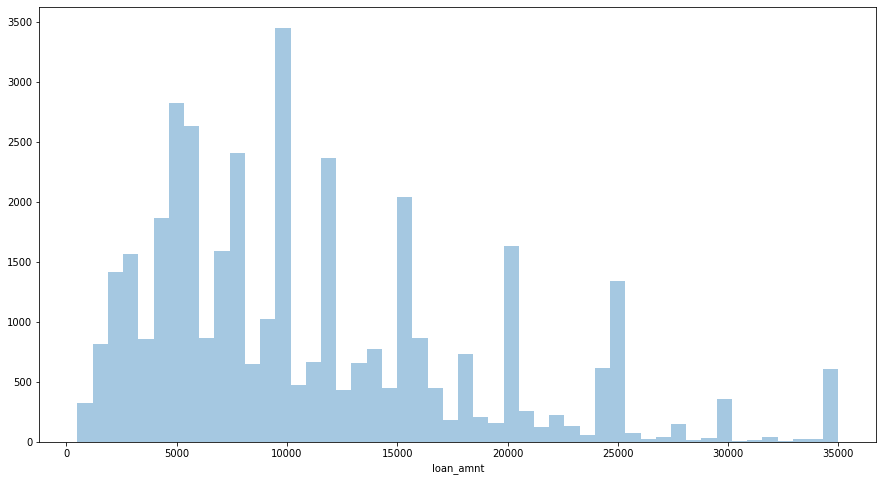

In [21]:

prime_loan.loan_amnt.isnull().sum()

#Finding Loan amount
plt.figure(figsize=(15,8))
sns.distplot(prime_loan.loan_amnt, kde = False)
plt.show
prime_loan.loan_amnt.describe()

#Creating Bins For Loan Amount 
def loan_amount_bkt(amount):
    if amount < 5000:
        return 'Low'
    elif amount >=5000 and amount < 15000:
        return 'Medium'
    else :
        return 'High'

prime_loan['loan_amnt_bkt'] = prime_loan['loan_amnt'].apply(lambda x: loan_amount_bkt(x))


In [22]:
#Looking at Annual Income
#Creating Bins For Annual Income
def annual_incm_bkt(amount):
    if amount < 100000:
        return 'Medium'
    elif amount > 100000 and amount <=1000000:
        return 'High'
    else :
        return 'Very High'



prime_loan['annual_incm_bkt'] = prime_loan['annual_inc'].apply(lambda x: annual_incm_bkt(x))
prime_loan.annual_incm_bkt.value_counts()

Medium       32598
High          5467
Very High      512
Name: annual_incm_bkt, dtype: int64

In [23]:
#Developing Buckets for DTI

def dti_bkt(dtiStr): # Function to bucket dti
    if dtiStr <= 10:
        return 'Low'
    elif dtiStr > 10 and dtiStr <=20:
        return 'Medium'
    else:
        return 'High'
    

prime_loan['dti_bkt'] = prime_loan['dti'].apply(lambda x: dti_bkt(x)) # Bucket Dti
prime_loan.dti_bkt.value_counts()

Medium    18441
Low       12935
High       7201
Name: dti_bkt, dtype: int64

In [24]:
# Bucket interest rates 
def int_rate_bkt(amount):
    if amount <= 10:
        return 'Low'
    elif amount > 10 and amount <=20:
        return 'Medium'
    else :
        return 'High'
prime_loan['int_rate_bkt'] = prime_loan['int_rate'].apply(lambda x: int_rate_bkt(x))
prime_loan[['int_rate_bkt','int_rate']]


,int_rate_bkt,int_rate
0,Medium,10.650
1,Medium,15.270
2,Medium,15.960
3,Medium,13.490
4,Low,7.900
...,...,...
38572,Low,8.070
38573,Medium,10.280
38574,Low,8.070
38575,Low,7.430


count     38577
unique        7
top           B
freq      11675
Name: grade, dtype: object

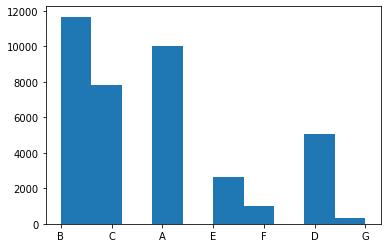

In [25]:
#Plotting histogram for checking mode value and grade
plt.hist(prime_loan.grade)
plt.show
prime_loan.grade.describe()

#Observation : Grade B is associated with maximum applicants

count     38577
unique       35
top          A4
freq       2873
Name: sub_grade, dtype: object

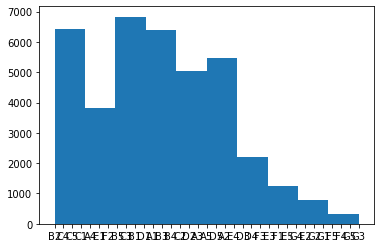

In [26]:
#Histogram for subgrade and checking mode value
plt.hist(prime_loan.sub_grade)
plt.show
prime_loan.sub_grade.describe()

#Observation : Sub-grade B3 has most applicants

In [27]:
#Plotting histogram for emploment length and checking mode value
prime_loan.emp_length.isnull().sum()

prime_loan.emp_length.describe()
prime_loan.emp_length.value_counts()

#Since the percentage of missing data is 2.75 percent, 
#Imputing emp length.Because the data is categorical, the mode is appropriate.

prime_loan.emp_length = prime_loan.emp_length.fillna('10+ years')






<function matplotlib.pyplot.show>

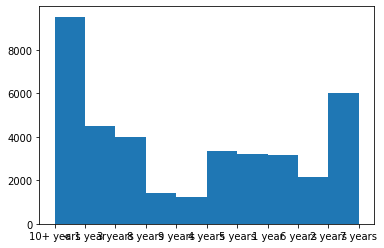

In [28]:
plt.hist(prime_loan.emp_length)
plt.show

##Segmented Univariate Analysis

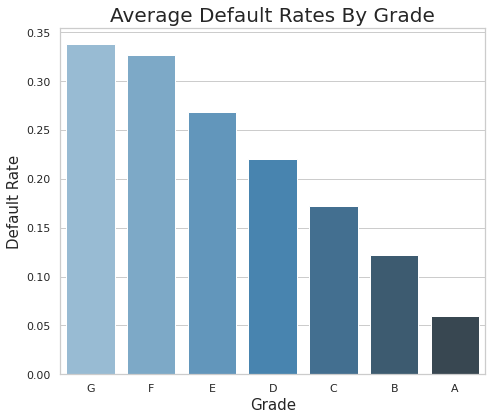

In [29]:

#Utilising Seaborn Barplot
#Top Defaulters by Grade
plt.figure(figsize=(7,6))
sns.set(style="whitegrid")
result = prime_loan.groupby(["grade"])['loan_status'].aggregate(np.mean).reset_index().sort_values('loan_status', ascending = False)
ax = sns.barplot(x= 'grade', y = 'loan_status', data = prime_loan,ci=None, palette="Blues_d", order = result['grade'] )

#set labels
plt.xlabel("Grade", size=15)
plt.ylabel("Default Rate", size=15)
plt.title("Average Default Rates By Grade", size=20)
plt.tight_layout()
plt.savefig("Average Default Rates By Grade.png", dpi=100)
plt.show()


**Observations** : Higher grades have been linked to a rise in the number of people who default. Grades in the G, F, E, and D grading scales have been shown to be very hazardous and should be avoided at all costs.

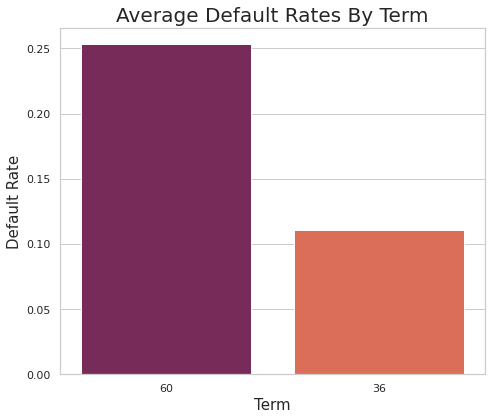

In [30]:
#Top Defaulters by Term
plt.figure(figsize=(7,6))
sns.set(style="whitegrid")
result = prime_loan.groupby(["term"])['loan_status'].aggregate(np.mean).reset_index().sort_values('loan_status', ascending = False)
ax = sns.barplot(x= 'term', y = 'loan_status', data = prime_loan,ci=None, palette="rocket",order = result['term'] )

#set labels
plt.xlabel("Term", size=15)
plt.ylabel("Default Rate", size=15)
plt.title("Average Default Rates By Term", size=20)
plt.tight_layout()
plt.savefig("Average Default Rates By Term.png", dpi=100)
plt.show()

**Observations** : Higher default rates are being seen on loans having a period of 60 months or more. We'll look at the riskiest types of loans in more detail by examining them according to their intended use.

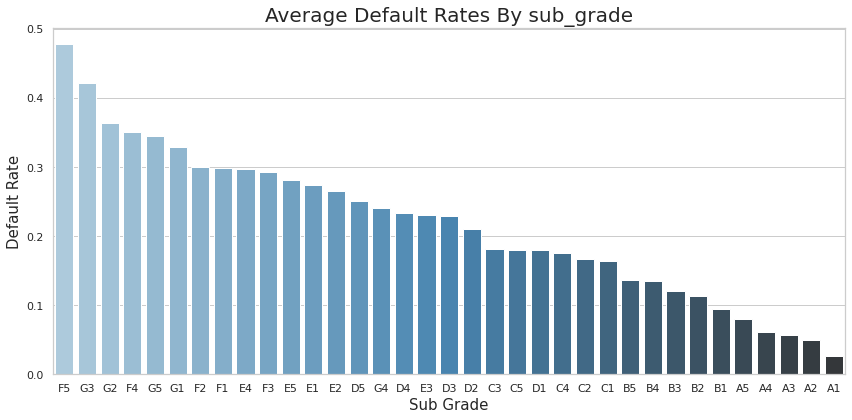

In [31]:
#Top Defaulters by SubGrades
plt.figure(figsize=(12,6))
sns.set(style="whitegrid")
result = prime_loan.groupby(["sub_grade"])['loan_status'].aggregate(np.mean).reset_index().sort_values('loan_status', ascending = False)
ax = sns.barplot(x= 'sub_grade', y = 'loan_status', data = prime_loan,ci=None, palette="Blues_d", order = result['sub_grade'] )

#set labels
plt.xlabel("Sub Grade", size=15)
plt.ylabel("Default Rate", size=15)
plt.title("Average Default Rates By sub_grade", size=20)
plt.tight_layout()
plt.savefig("Average Default Rates By sub_grade.png", dpi=100)
plt.show()

**Observations** : Sub grade G2, F5, F1-D4, are proving to be at risk.

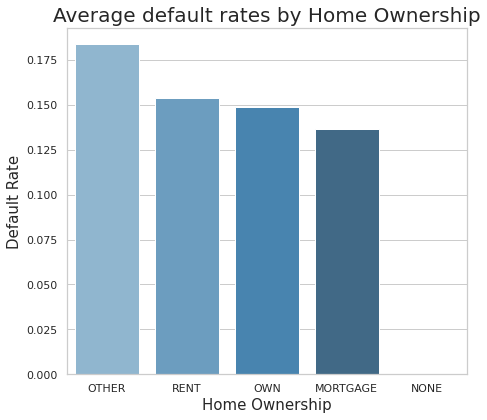

In [32]:
#Top Defaulters by Home Ownership
plt.figure(figsize=(7,6))
sns.set(style="whitegrid")
result = prime_loan.groupby(["home_ownership"])['loan_status'].aggregate(np.mean).reset_index().sort_values('loan_status', ascending = False)
ax = sns.barplot(x= 'home_ownership', y = 'loan_status', data = prime_loan,ci=None, palette="Blues_d", order = result['home_ownership'] )

#set labels
plt.xlabel("Home Ownership", size=15)
plt.ylabel("Default Rate", size=15)
plt.title("Average default rates by Home Ownership", size=20)
plt.tight_layout()
plt.savefig("Average Default Rates By Home Ownership.png", dpi=100)
plt.show()

**Observations** : Loans that are taken by people marked as "Other" have highest risk associated with them.

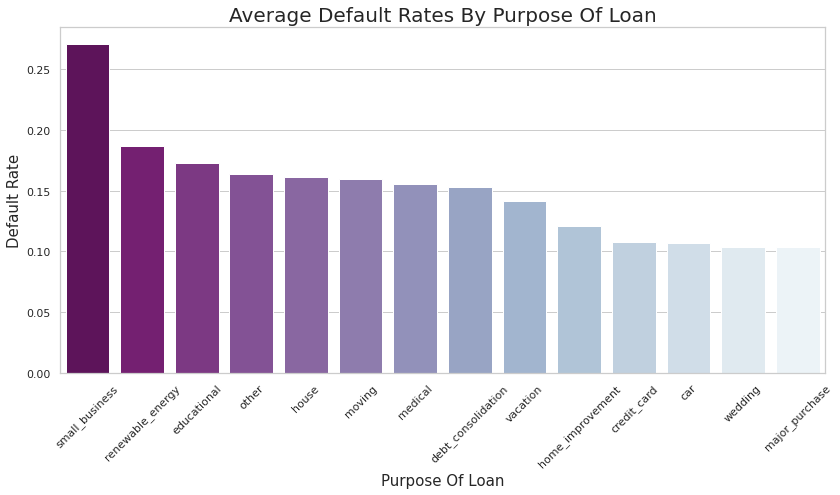

In [33]:
#Top Defaulters by Loan purpose
plt.figure(figsize=(12,6))
sns.set(style="whitegrid")
result = prime_loan.groupby(["purpose"])['loan_status'].aggregate(np.mean).reset_index().sort_values('loan_status', ascending = False)
ax = sns.barplot(x= 'purpose', y = 'loan_status', data = prime_loan,ci=None, palette="BuPu_r", order = result['purpose'] )

#set labels
plt.xlabel("Purpose Of Loan", size=15)
plt.ylabel("Default Rate", size=15)
plt.title("Average Default Rates By Purpose Of Loan", size=20)
plt.tight_layout()
plt.savefig("Average Default Rates By Purpose Of Loan.png", dpi=100)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()


**Observations** : This plot is quite interesting as the most riskiest category is small businesses which is followed by renewable energy and then educational. This will further be analyzed in following section.

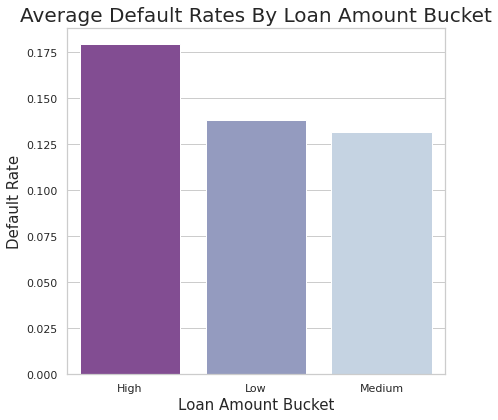

In [34]:
#Top Defaulters by Loan Amount
plt.figure(figsize=(7,6))
sns.set(style="whitegrid")
result = prime_loan.groupby(['loan_amnt_bkt'])['loan_status'].aggregate(np.mean).reset_index().sort_values('loan_status', ascending = False)
ax = sns.barplot(x= 'loan_amnt_bkt', y = 'loan_status', data = prime_loan,ci=None, palette="BuPu_r", order = result['loan_amnt_bkt'])

#set labels
plt.xlabel("Loan Amount Bucket", size=15)
plt.ylabel("Default Rate", size=15)
plt.title("Average Default Rates By Loan Amount Bucket", size=20)
plt.tight_layout()
plt.savefig("Average Default Rates By Loan Amount Bucket.png", dpi=100)
plt.show()

**Observations** : In loan amount bucket, it can be seen that High category is associated with most defaulters followed by low and medium, which seems to be quite unusual. 

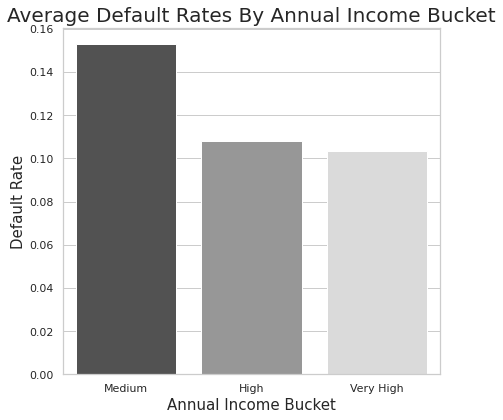

In [35]:
#Top Defaulters by Annual Income
plt.figure(figsize=(7,6))
sns.set(style="whitegrid")
result = prime_loan.groupby(['annual_incm_bkt'])['loan_status'].aggregate(np.mean).reset_index().sort_values('loan_status', ascending = False)
ax = sns.barplot(x= 'annual_incm_bkt', y = 'loan_status', data = prime_loan,ci=None, palette="Greys_r", order = result['annual_incm_bkt'])

#set labels
plt.xlabel("Annual Income Bucket", size=15)
plt.ylabel("Default Rate", size=15)
plt.title("Average Default Rates By Annual Income Bucket", size=20)
plt.tight_layout()
plt.savefig("Average Default Rates By Annual Income Bucket.png", dpi=100)
plt.show()

**Observations** : Those with an annual income in the moderate and high range have the greatest default rates. In bivariate analysis, we can examine whether this is since they requested larger loan amounts.

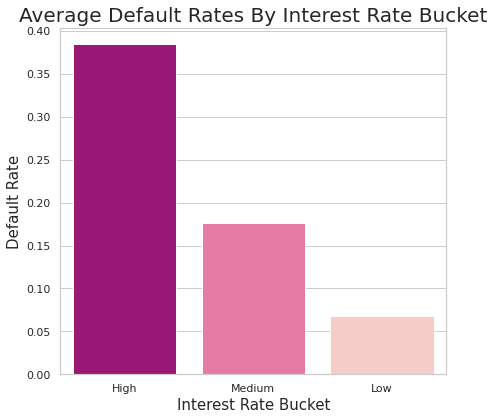

In [36]:
#Top Defaulters by Interest Rate Bucket
plt.figure(figsize=(7,6))
sns.set(style="whitegrid")
result = prime_loan.groupby(['int_rate_bkt'])['loan_status'].aggregate(np.mean).reset_index().sort_values('loan_status', ascending = False)
ax = sns.barplot(x= 'int_rate_bkt', y = 'loan_status', data = prime_loan,ci=None, palette="RdPu_r", order = result['int_rate_bkt'])

#set labels
plt.xlabel("Interest Rate Bucket", size=15)
plt.ylabel("Default Rate", size=15)
plt.title("Average Default Rates By Interest Rate Bucket", size=20)
plt.tight_layout()
plt.savefig("Average Default Rates By Interest Rate Bucket.png", dpi=100)
plt.show()

**Observations** : Interest rates on riskier loans have risen in recent years, which has led to a rise in default rates.

# Bivariate Analysis

In [56]:

#We'd like to concentrate our investigation on the top three loan purposes with the greatest default rate.
top_3 = prime_loan[prime_loan.purpose.isin(['small_business','renewable_energy','educational'])]
top_3.purpose.unique()

array(['small_business', 'renewable_energy', 'educational'], dtype=object)

In [58]:
#A bivariate analysis function is created since it will be used often and to avoid any redunduncy. 
def bivariate(var):
    
    plt.figure(figsize=[12, 7])
    
    plot = sns.barplot(x=var, y="loan_status", hue='purpose',data=top_3, ci=None, palette="pastel")
    plt.xlabel(var, size=15)
    plt.ylabel("Avg. Loan Default Rate", size=15)
    plt.title("Default Rate vs."+" "+var, size=20)
    
    plt.setp(plot.get_legend().get_texts(), fontsize='20') # for legend text
    plt.setp(plot.get_legend().get_title(), fontsize='25') # for legend title

    plt.tight_layout()
    plt.show()

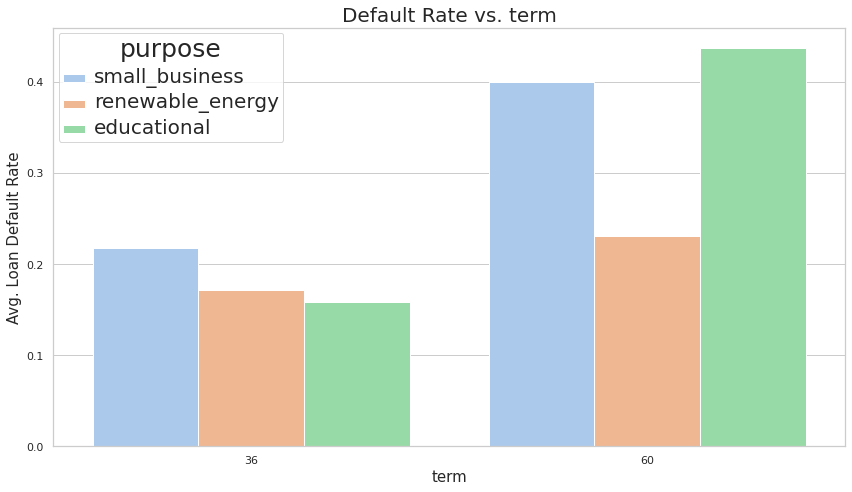

In [59]:
bivariate('term')

**Observations** :Lending Club should discontinue lending long-term loans to small businesses, and educational purposes with 60 months term, since more than a third of these borrowers have defaulted on their payments.

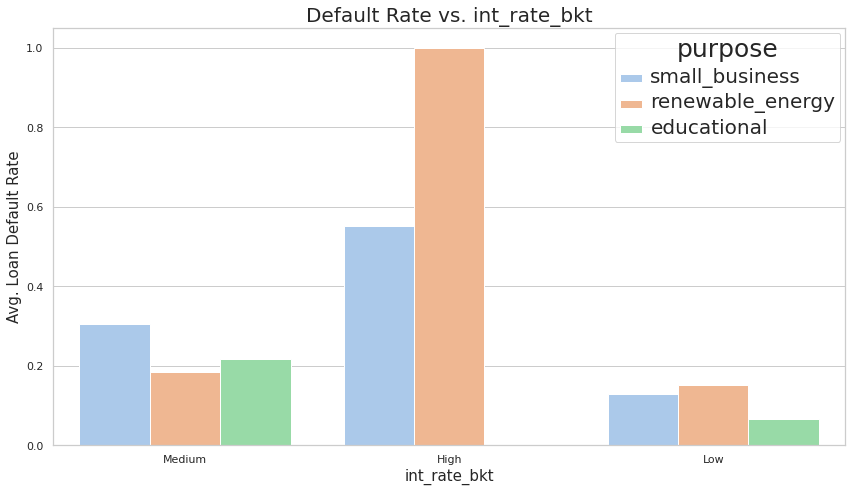

In [50]:
#Plot for interest rate vs average default rate
bivariate('int_rate_bkt')

**Observations** : Each interest rate category, small businesses and others are among the top defaulters. LC should use extreme caution when approving loans for these reasons, particularly in the higher interest brackets. There are no exceptions to this rule when it comes to high-interest loans for weddings.

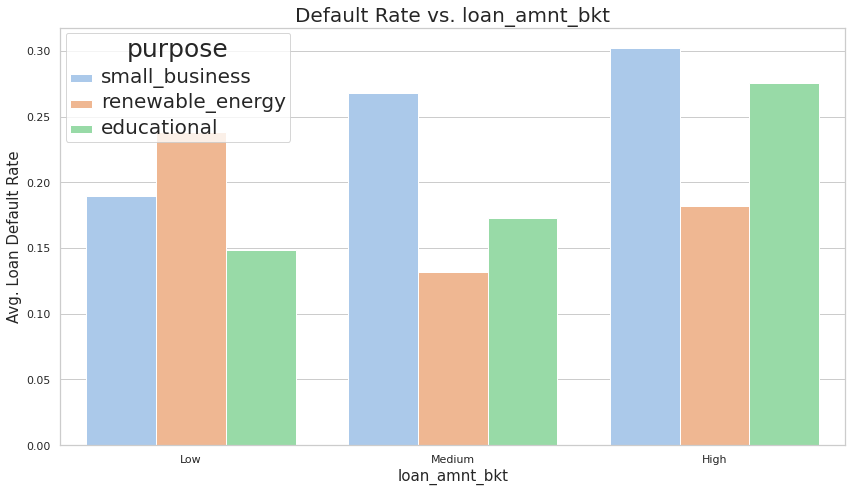

In [51]:
#Plot for loan amount vs average default rate for top 3 default purposes
bivariate('loan_amnt_bkt')

**Observations** : Small business loans with a large loan amount and renewable energy with a low loan amount must not be granted since more than 30% and 25% of them default, respectively. 

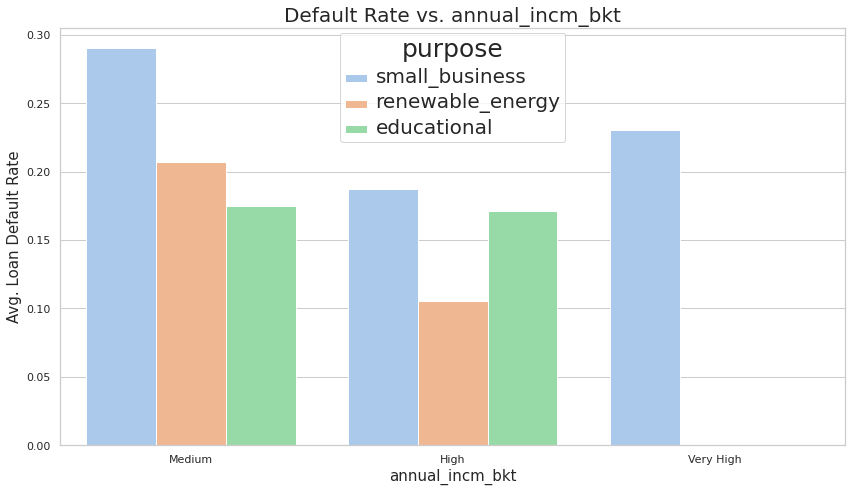

In [52]:
bivariate('annual_incm_bkt')

**Observations** : Here, small business categories are defaulting the most at annual income bucket followed by renewable energy in medium annual income bucket.In very high risk, only small business is defaulting. LC should look into this.

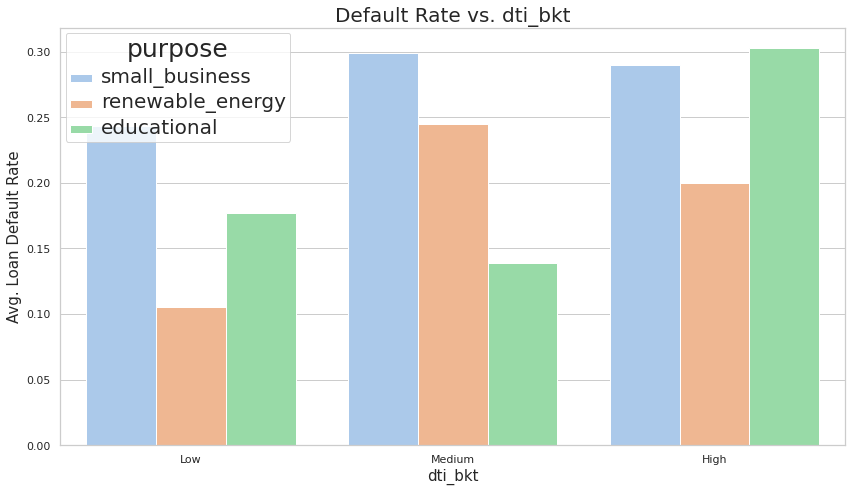

In [53]:
bivariate('dti_bkt')

**Observations** : Small businesses and educational categories are defaulting highest at the DTI - high. At medium DTI, small business and renewable energy is defaulting the most.

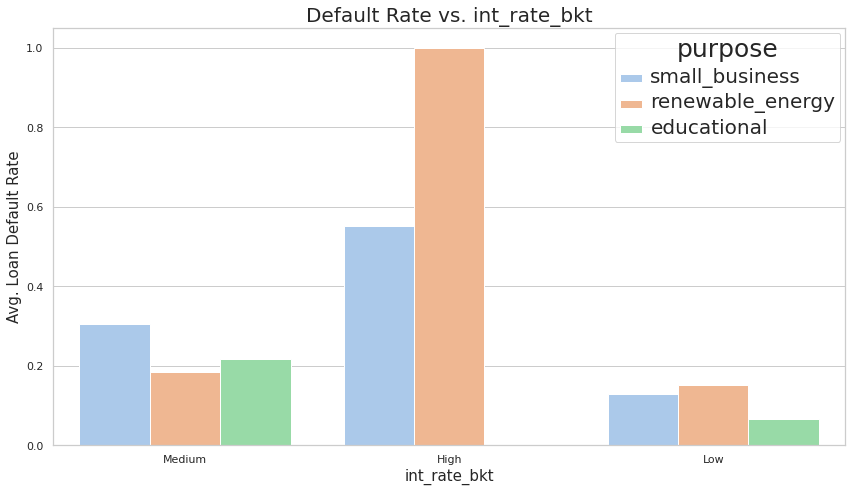

In [54]:
bivariate('int_rate_bkt')

**Observations** : Small business with high interest rate are defaultig at 100%. LC should avoid doing this and do not give loans to small business.

In [45]:
sns

<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

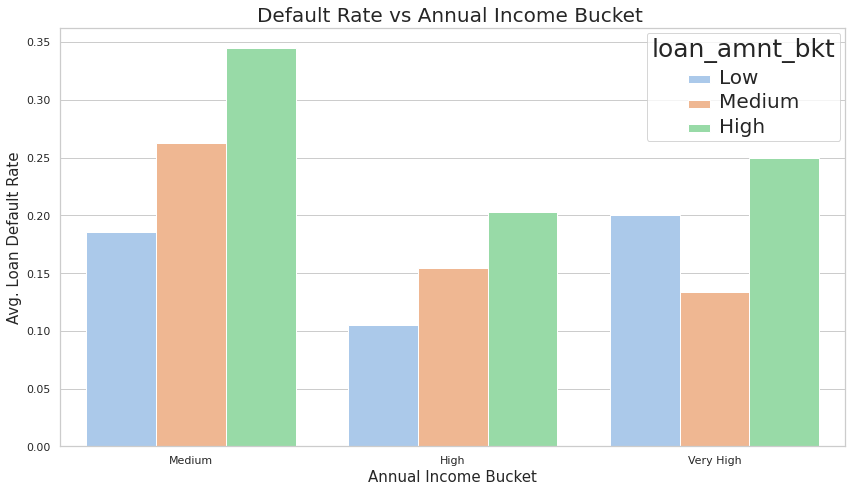

In [60]:
# Default Rate Vs Annual Income Bucket   
plt.figure(figsize=[12, 7])
    
plot = sns.barplot(x= 'annual_incm_bkt', y="loan_status", hue='loan_amnt_bkt',data=top_3, ci=None, palette="pastel")
plt.xlabel("Annual Income Bucket", size=15)
plt.ylabel("Avg. Loan Default Rate", size=15)
plt.title("Default Rate vs Annual Income Bucket ", size=20)
    
plt.setp(plot.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='25') # for legend title

plt.tight_layout()
plt.show()

**Observation** : It was seen from above that at annual income bucket people with medium income are at very high risk

**Observations** : We discovered that persons with a medium yearly income are more likely to fail on their loans after doing a segmented univariate study. People with a median annual income are more likely to request for larger loans, which increases the risk of their defaulting. LC should put a halt to these loans.